In [382]:
% matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [383]:
comp = pd.read_csv("/home/mikhail/Projects/nmr/sandbox/computed_matrix", sep = '\t', header=None)
for i in range(comp.shape[0]):
    comp.iloc[i, i] = 0.0

In [384]:
exp_stacked = pd.read_csv("/home/mikhail/Projects/nmr/sandbox/matrix/0", sep = '\t', header=None)
empty = pd.DataFrame([[0.0]*comp.shape[0]]*comp.shape[1])
exp = (empty + exp_stacked.pivot(0, 1, 2)).fillna(0.0)

In [385]:
groups = {}
groups_file = open("/home/mikhail/Projects/nmr/sandbox/groups/eq_groups", 'r')
for line in groups_file.readlines():
    nums = line.split()
    groups.update({';'.join(nums[1:]) : int(nums[0])})
groups_file.close()

In [386]:
# just change groups index to real atom group index from pdb

reverse_groups = dict(zip(groups.values(), groups.keys()))

comp_tmp = comp.copy()
comp_tmp.columns = comp_tmp.columns.map(lambda x: reverse_groups[x])
comp_tmp.index = comp_tmp.columns
comp_tmp = comp_tmp.stack()

exp_tmp = exp.copy()
exp_tmp.columns = exp_tmp.columns.map(lambda x: reverse_groups[x])
exp_tmp.index = exp_tmp.columns
exp_tmp = exp_tmp.stack()

computed_final = comp_tmp[exp_tmp[abs(exp_tmp) > 0.0].index]
#computed_final.to_csv('../../computed', header=None, sep='\t', float_format = "%.4f")
exp_final = exp_tmp[abs(exp_tmp) > 0.0]
#exp_final.to_csv('../../reference', header=None, sep='\t', float_format = "%.4f")

In [387]:
def mksym(df):
    local = df.copy()
    for i in range(local.shape[0]):
        for j in range(local.shape[1]):
            if abs(local.iloc[i, j]) < 0.0000001:
                local.iloc[i, j] = local.iloc[j, i]
    return local

def diag_null(df):
    local = df.copy()
    for i in range(local.shape[0]):
        local.iloc[i, i] = 0.0
    return local

exp = mksym(exp)

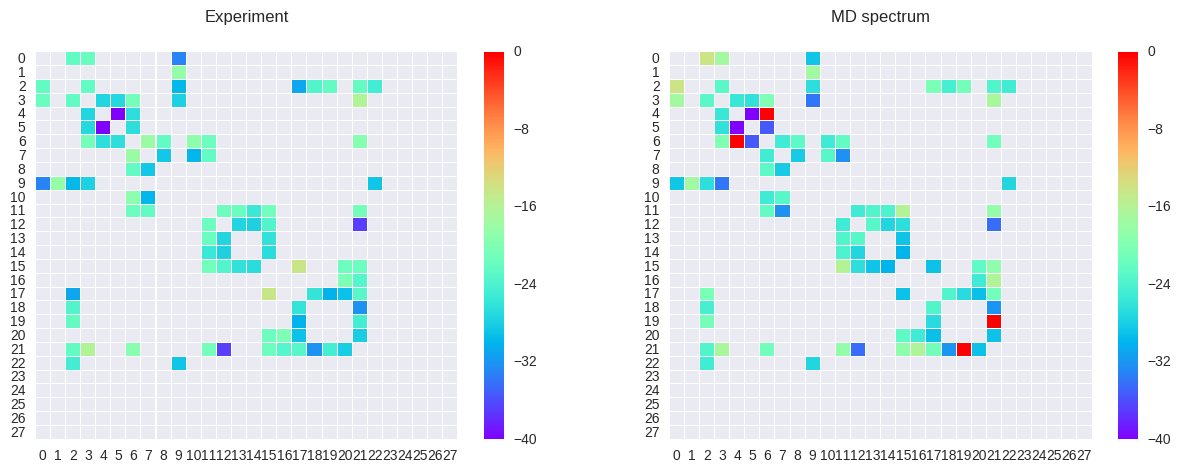

In [381]:
rect = (0, 30)

plt.figure(figsize=(15, 5))
#plt.figure(figsize=(7, 5))

plt.subplot(1, 2, 1)
plt.title("Experiment", y=1.06)
exp_tmp = mksym(exp.applymap(lambda x: np.sign(x)*pow(abs(x), 1/6.)).iloc[rect[0]:rect[1], rect[0]:rect[1]])
exp_tmp = exp_tmp.replace(0, np.nan)
sns.heatmap(exp_tmp, linewidths=0.01, cmap="rainbow", vmin=-40, vmax=-0)

plt.subplot(1, 2, 2)
comp_tmp = comp.applymap(lambda x: np.sign(x)*pow(abs(x), 1/6.)).iloc[rect[0]:rect[1], rect[0]:rect[1]]
comp_tmp = comp_tmp[np.isnan(exp_tmp) == False] 
#comp_tmp = comp_tmp.replace(np.nan, 0)
sns.heatmap(comp_tmp, linewidths=0.01, cmap="rainbow", vmin=-40, vmax=-0)
#ax = sns.heatmap(abs((comp_tmp - exp_tmp) / exp_tmp)*100, linewidths=0.01, 
#                 cmap="inferno_r", vmin=0, vmax=200)#, square=True)

#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0, 50, 100, 150, 200])
#cbar.set_ticklabels(['0%', '50%', '100%', '150%', '200%'])

plt.title("MD spectrum", y=1.06)
#plt.title("Our structure")

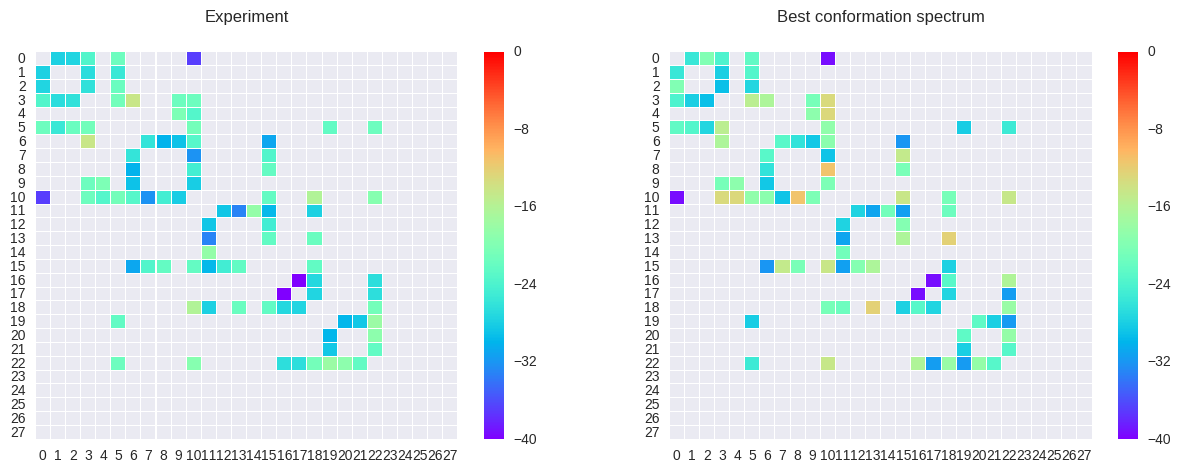

In [388]:
rect = (0, 30)

plt.figure(figsize=(15, 5))
#plt.figure(figsize=(7, 5))

plt.subplot(1, 2, 1)
plt.title("Experiment", y=1.06)
exp_tmp = mksym(exp.applymap(lambda x: np.sign(x)*pow(abs(x), 1/6.)).iloc[rect[0]:rect[1], rect[0]:rect[1]])
exp_tmp = exp_tmp.replace(0, np.nan)
sns.heatmap(exp_tmp, linewidths=0.01, cmap="rainbow", vmin=-40, vmax=-0)

plt.subplot(1, 2, 2)
comp_tmp = comp.applymap(lambda x: np.sign(x)*pow(abs(x), 1/6.)).iloc[rect[0]:rect[1], rect[0]:rect[1]]
comp_tmp = comp_tmp[np.isnan(exp_tmp) == False] 
#comp_tmp = comp_tmp.replace(np.nan, 0)
sns.heatmap(comp_tmp, linewidths=0.01, cmap="rainbow", vmin=-40, vmax=-0)
#ax = sns.heatmap(abs((comp_tmp - exp_tmp) / exp_tmp)*100, linewidths=0.01, 
#                 cmap="inferno_r", vmin=0, vmax=200)#, square=True)

#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0, 50, 100, 150, 200])
#cbar.set_ticklabels(['0%', '50%', '100%', '150%', '200%'])

plt.title("Best conformation spectrum", y=1.06)
#plt.title("Our structure")

In [311]:
pp

### Sorted scores for 60k cycles

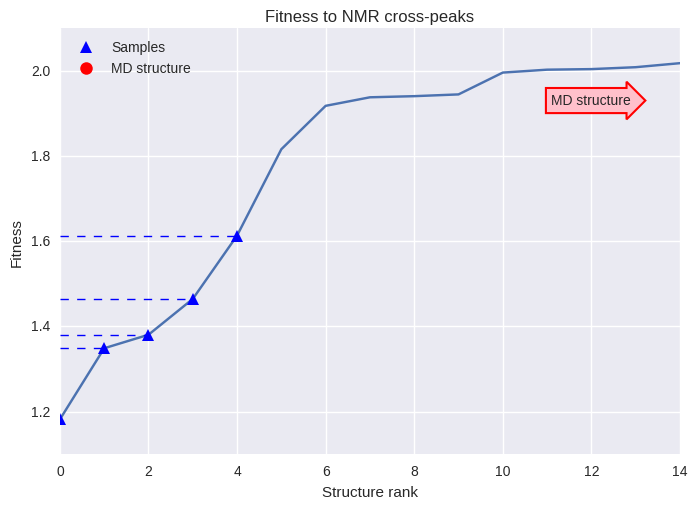

In [160]:
scores1 = pd.read_csv('/home/mikhail/Projects/nmr/sandbox/RUN2res/set4/chi_scores_vol_sorted', 
                         sep='\t', header=None, index_col=0)

n = 15

for i in scores1.columns:
    plt.plot(list(range(n)), sorted(scores1[i][:n]))
    plt.plot(list(range(5)), sorted(scores1[i][:5]), 'b^', markersize=9, label='Samples')
    
for i in range(5):
    val = sorted(scores1[1])[i]
    plt.plot([0, i], [val, val], 'b-', linestyle='--', linewidth=1.0, markersize=9)
    
plt.plot([], [], 'ro', markersize=9, label='MD structure')
#plt.annotate('MD structure', xy=(13.5, 2.05), xytext=(9, 2.05), 
#              arrowprops=dict(facecolor='r', shrink=0.05, width=2.5, headwidth=8), )  
    
bbox_props = dict(boxstyle="rarrow, pad=0.4", fc="pink", ec="r", lw=1.5)
t = plt.text(12, 1.93, "MD structure", ha="center", va="center", rotation=0, size=10, bbox=bbox_props)

plt.title('Fitness to NMR cross-peaks')
plt.ylabel('Fitness')
plt.xlabel('Structure rank')

plt.legend(loc=2)
plt.show()

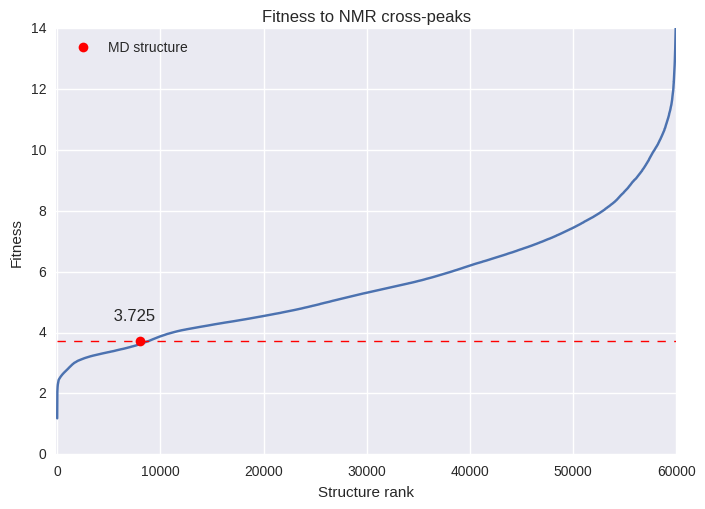

In [171]:
scores1 = pd.read_csv('/home/mikhail/Projects/nmr/sandbox/RUN2res/set4/chi_scores_vol_sorted', 
                         sep='\t', header=None, index_col=0)

n = 60000

for i in scores1.columns:
    plt.plot(list(range(n)), sorted(scores1[i][:n]))
    
plt.plot([8000], [3.725], 'ro', label='MD structure')

plt.plot([0, 60000], [3.725, 3.725], 'r-', linestyle='--', linewidth=1.0)
plt.annotate(' 3.725 ', xy=(0, 0), xytext=(5000, 4.4), size=12)
    
plt.title('Fitness to NMR cross-peaks')
plt.ylabel('Fitness')
plt.xlabel('Structure rank')
plt.legend(loc=2)
plt.ylim(0, 14)
plt.xlim(-100, 60000)
plt.show()

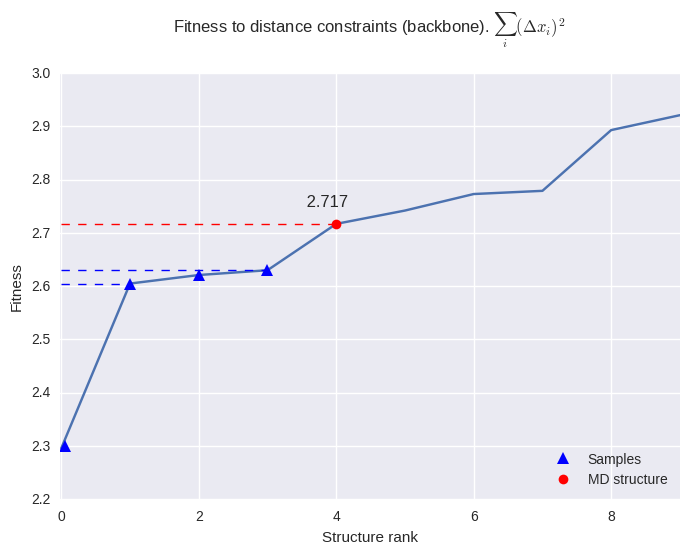

In [135]:
scores2 = pd.read_csv('/home/mikhail/Projects/nmr/sandbox/1000k_schdrop/distance_filtered', 
                         sep='\t', header=None, index_col=0)

n = 10

fig = plt.figure()
#ax = fig.add_subplot(111)

for i in scores2.columns:
    plt.plot(list(range(n)), sorted(scores2[i][:n]))
    
plt.plot([0.05, 1, 2, 3], [2.3, 2.605, 2.621, 2.630], 'b^', markersize=9, label='Samples')
plt.plot([4], [2.717], 'ro', label='MD structure')

#plt.axhline(y=2.717, linewidth=1, color='r', linestyle='--')
plt.plot([0, 4], [2.717, 2.717], 'r-', linestyle='--', linewidth=1.0, markersize=9)
plt.plot([0, 3], [2.630, 2.630], 'b-', linestyle='--', linewidth=1.0, markersize=9)
plt.plot([0, 1], [2.605, 2.605], 'b-', linestyle='--', linewidth=1.0, markersize=9)

plt.annotate(' 2.717 ', xy=(4, 2.717), xytext=(3.5, 2.75))
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.legend(loc=4)
plt.title(r'Fitness to distance constraints (backbone). $\sum_{i} (\Delta x_i)^2 $ ', y=1.08)
plt.ylabel('Fitness')
plt.xlabel('Structure rank')

plt.xlim(-0.02, 9)

plt.show()

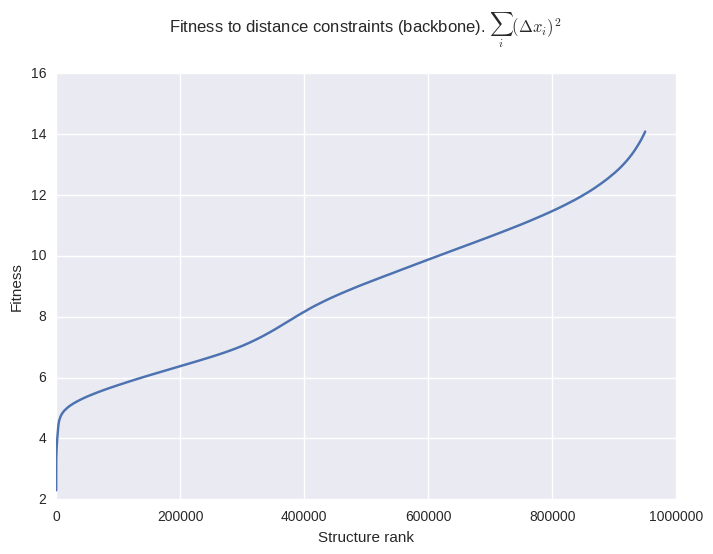

In [13]:
scores2 = pd.read_csv('/home/mikhail/Projects/nmr/sandbox/1000k_schdrop/distance_filtered', 
                         sep='\t', header=None, index_col=0)

n = 950000

fig = plt.figure()
ax = fig.add_subplot(111)

for i in scores2.columns:
    plt.plot(list(range(min(n, scores2.shape[0]))), sorted(scores2[i][:n]))
    
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%i'))
    
#plt.plot([0], [4.600], 'b*')
plt.title(r'Fitness to distance constraints (backbone). $\sum_{i} (\Delta x_i)^2 $ ', y=1.08)
plt.ylabel('Fitness')
plt.xlabel('Structure rank')
plt.show()

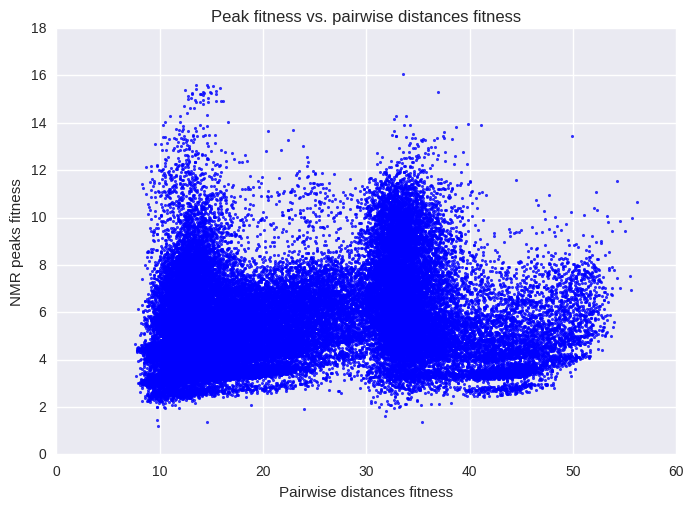

In [15]:
scores1 = pd.read_csv('/home/mikhail/Projects/nmr/sandbox/RUN2res/set4/chi_scores_vol', 
                         sep='\t', header=None, index_col=0)
scores2 = pd.read_csv('/home/mikhail/Projects/nmr/sandbox/RUN2res/set4/dist',
                         sep=' ', header=None)
scores1.index = range(scores2.shape[0])
scores2.index = range(scores2.shape[0])

data=pd.concat([scores1, scores2], axis=1).iloc[:60000, :]
#sns.kdeplot(data[0], data[1], n_levels=30, cmap="Purples_d")
sns.regplot(data[0], data[1], fit_reg=False, marker='.', color='b')
plt.ylabel('NMR peaks fitness')
plt.xlabel('Pairwise distances fitness')
plt.title('Peak fitness vs. pairwise distances fitness')